### Imports

In [1]:
import mdtraj as md
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load in aligned, closed and open EncHo structures

In [2]:
EncHo_close = md.load_pdb("7oe2_Mono_Close_Align.pdb")

EncHo_open = md.load_pdb("7oeu_Mono_Open_Align.pdb")

### Join

In [3]:
Closed_to_open_traj = md.join((EncHo_close, EncHo_open))

In [4]:
Closed_to_open_traj

<mdtraj.Trajectory with 2 frames, 2034 atoms, 266 residues, without unitcells at 0x7fb51ef76510>

In [5]:
# Save outtraj
#Closed_to_open_traj.save_pdb("closed_to_open.pdb")

#### RMSD not what was needed

In [6]:
# Compute RMSD of protein
rmsd_protein = md.rmsd(Closed_to_open_traj, Closed_to_open_traj)

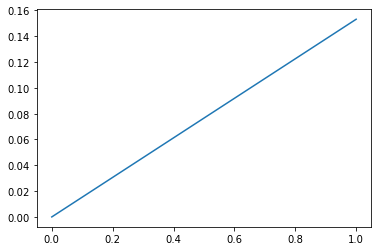

In [7]:
plt.plot(rmsd_protein)

#### RMSF

In [8]:
# selecting alpha carbon index
CA_selection = Closed_to_open_traj.topology.select('protein and name CA')

In [9]:
# Applying index selection to trajectory
traj_Ca = Closed_to_open_traj.atom_slice(CA_selection)

In [10]:
# Compute RMSF of alpha carbons
rmsf_Ca = md.rmsf(traj_Ca, traj_Ca)

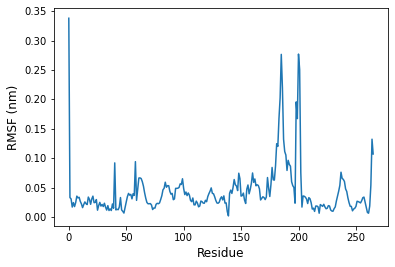

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_xlabel('Residue', fontsize=12)
ax.set_ylabel('RMSF (nm)', fontsize=12)

Line = ax.plot(rmsf_Ca)


plt.savefig('EncHo_RMSF.png')

In [12]:
# Add RMSF values to dataframe
rmsf_Ca_db = pd.DataFrame(rmsf_Ca)

In [13]:
rmsf_Ca_db

,0
0,0.337915
1,0.033021
2,0.030617
3,0.016821
4,0.024380
...,...
261,0.006333
262,0.018528
263,0.053960
264,0.132230


In [14]:
rmsf_Ca_db.iloc[0]

0    0.337915
Name: 0, dtype: float32

In [15]:
# df['column'].nlargest(n=5)
rmsf_Ca_db[0].nlargest(n=15)

0      0.337915
200    0.276965
185    0.276454
201    0.250541
186    0.219606
184    0.202757
198    0.195660
183    0.167500
199    0.167204
264    0.132230
187    0.132151
181    0.124471
182    0.120012
188    0.111185
265    0.107035
Name: 0, dtype: float32

In [16]:
# Section Database, A-loop
x = np.arange(179, 193, 1)
y = rmsf_Ca_db.iloc[179:193]
#z = rmsf_Ca_db.iloc[179:193]

In [17]:
np.mean(y)

0    0.133831
dtype: float32

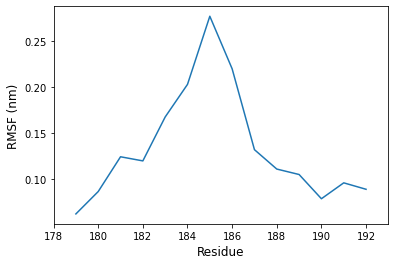

In [18]:
# Plot the graph
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(178, 193)
#ax.set_ylim(0.075, 0.125)
ax.set_xlabel('Residue', fontsize=12)
ax.set_ylabel('RMSF (nm)', fontsize=12)

Line = ax.errorbar(x,y)

#plt.savefig('EncHo-RMSF-Aloop.png')

In [19]:
# Hinge 1 
a = np.arange(121, 132, 1)
b = rmsf_Ca_db.iloc[121:132]

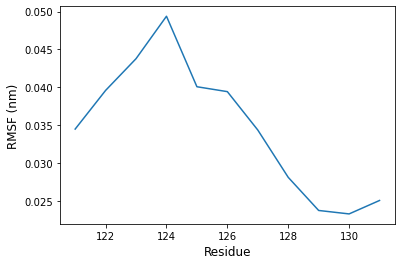

In [20]:
# Plot the graph
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_xlabel('Residue', fontsize=12)
ax.set_ylabel('RMSF (nm)', fontsize=12)

Line = ax.errorbar(a,b)

#plt.savefig('EncHo-RMSF-Hinge1.png')

In [21]:
np.mean(b)

0    0.034669
dtype: float32

In [22]:
# Hinge 2 
c = np.arange(201, 222, 1)
d = rmsf_Ca_db.iloc[201:222]

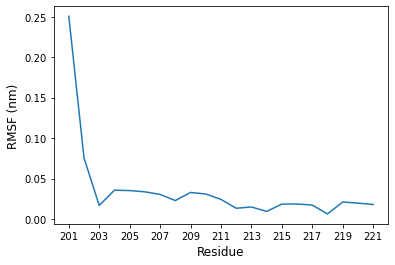

In [28]:
# Plot the graph
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_xlabel('Residue', fontsize=12)
ax.set_ylabel('RMSF (nm)', fontsize=12)
ax.set_xticks(np.arange(201,222,2))
Line = ax.errorbar(c,d)

plt.savefig('EncHo-RMSF-Hinge2.png')

In [24]:
np.mean(d)

0    0.035504
dtype: float32